1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [ ]:
import matplotlib.pyplot as plt

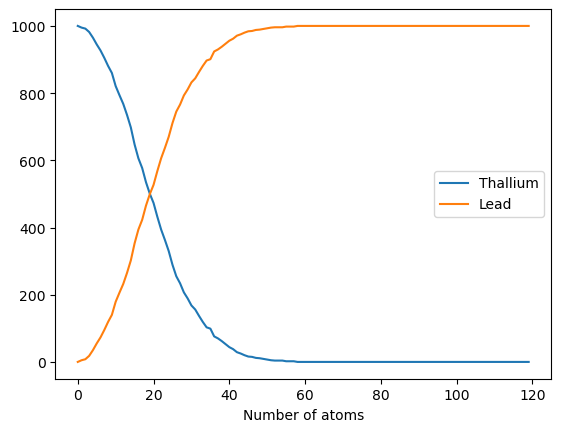

In [112]:
ts = np.arange(0, 2*60, 1)
pr = lambda ts: 1 - (2 ** (-ts/(3.052*60)))
#plt.plot(ts, pr)

thallium_atoms = 1000
lead_atoms = 0


thallium_lst = []
lead_lst = []
for t in ts:
    random_list = np.random.uniform(size=thallium_atoms)
    i = np.where(random_list > 1-pr(t))
    d = len(i[0])
    thallium_atoms -= d
    lead_atoms += d
    thallium_lst.append(thallium_atoms)
    lead_lst.append(lead_atoms)


plt.plot(ts, thallium_lst, label="Thallium")
plt.plot(ts, lead_lst, label="Lead")
plt.xlabel("time")
plt.xlabel("Number of atoms")
plt.legend()

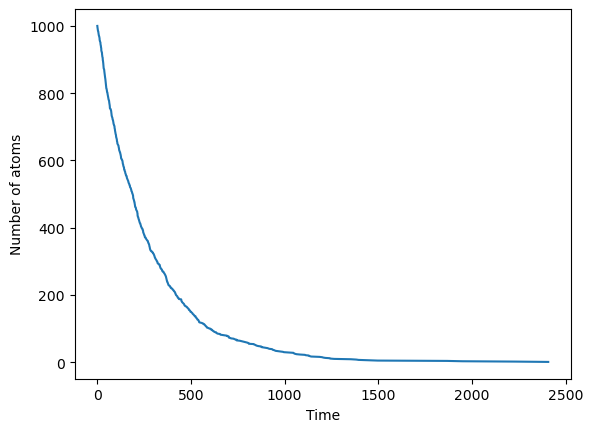

In [118]:
def p(x, k):
    2**(-x/k) * np.log(2) / k
    
def inverse_cdf(x, k):
    return - np.log(1-x) * k / np.log(2.0)

ts = np.zeros(N)

for i in range(N):
    p = np.random.uniform()
    ts[i] = inverse_cdf(p, 3.052*60)
    
ts = np.sort(ts)

plt.plot(ts, range(1000,0,-1), markersize=0.2)
plt.xlabel('Time')
plt.ylabel('Number of atoms')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [113]:
from scipy import random
import numpy as np
  
a = 0
b = 2
N = 1000
ar = np.zeros(N)

for i in range (len(ar)):
    ar[i] = random.uniform(a,b)

sumup = 0.0

def f(x):
    return (np.sin(1/(1-x)))**2
  
# iterates and sums up values of different functions
# of x
for i in ar:
    sumup += f(i)

integral = (b-a)/float(N)*sumup
  
# prints the solution
print ("The value calculated by mean value is {}.".format(integral))

The value calculated by mean value is 1.3602596598149144.


In [114]:
from scipy.integrate import quad

def integrand(x):
    if x == 1:
        x = x+ 0.000000001
    return (np.sin(1/(1-x)))**2
i = quad(integrand, 0.000001, 1.999999)
print(i[0])

1.347114397228859


/tmp/ipykernel_165197/860633564.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  i = quad(integrand, 0.000001, 1.999999)


Integral: 1.34422
The error is:  0.039749091700853716


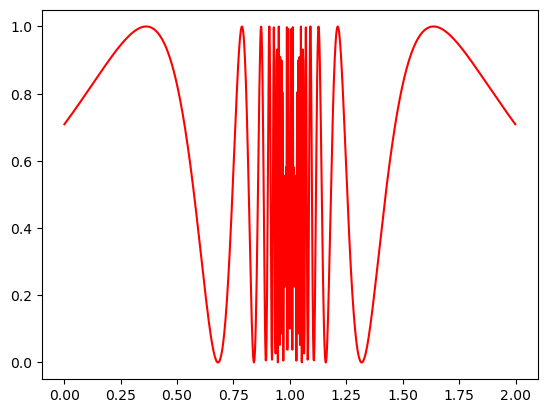

In [86]:
import matplotlib.pyplot as plt
def f(x):
    return (np.sin(1. / (1-x)))**2

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')

# Monte Carlo integration
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): count += 1
I = 2 * count / N
print("Integral:", I)
print('The error is: ', np.abs(I - integral)/integral)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [138]:
def f(x,y):
    if (x**2) + (y**2) <= 1:
        return 1
    else:
        return 0
r = 1
N = 1000000
count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    z = np.random.random()
    if z <= f(x,y):
        count += 1

print("For 2d circle: ",2*2*count/N)
print("The real value: ", np.pi*r**2)

For 2d circle:  3.14068
The real value:  3.141592653589793


In [139]:
def foo(x,y,a,b,c,d,e,f,g,h):
    if (x**2) + (y**2) + (a**2) + (b**2) + (c**2) + (d**2) + (e**2) + (f**2) + (g**2) + (h**2) <= 1:
        return 1
    else:
        return 0
    
r = 1
N = 100000
count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    d = np.random.random()
    e = np.random.random()
    f = np.random.random()
    g = np.random.random()
    h = np.random.random()
    if foo(x,y,a,b,c,d,e,f,g,h):
        count += 1
print("For 10d sphere: ", (np.pi**5) * (r**10)/120)


For 10d sphere:  2.550164039877345


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [131]:
def f(x):
    return (x**(-0.5))/(np.exp(x) + 1)

def w(x):
    return 1/np.sqrt(x)

s = []
for i in range(100):
    x = np.random.uniform(0,1) ** 2
    s = np.append(s, (f(x)/w(x)))

w = 2*np.sqrt(1) - 2*np.sqrt(0)
ans = (sum(s)/N)*w
print('Ans: ', ans)

Ans:  0.8387361139912644
